# TP53 and SRSF2 mutant cells

1)  Where do TP53 and SRSF2 mutant cells sit on the UMAP, does the position of these cells change with treatment?


      • Would you be able to make UMAP plots for the 5 patients where we have mutation data. I would like to see how the WT and MT cells change with time, therefore, I'd a UMAP plot for each of the three timepoints where they were measured. Can you have patients without the mutation in grey. Then put the other three outcomes (WT, MT and unknown) in unique colors.


      • There might be some interesting questions which arise from the analysis of WT and mutant cells.

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import warnings 
import numpy as np
import pandas as pd
import seaborn as sns


warnings.filterwarnings('ignore')
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=200, facecolor='white')

In [3]:
adata = sc.read_h5ad("HSC_gex_MDSpaper_figure2_newcelltypes_updatedtime.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 38809 × 28762
    obs: 'BARCODE', 'BEST', 'category', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'patient', 'dataset_name', 'timepoint', 'disease_state', 'outcome_C12D29', 'specific_outcome_C12D29', 'dataset', 'celltype', 'barcode', 'celltype_group', 'outcome_C6D28', 'specific_outcome_C6D28', 'timepoint_coarse', 'leiden', 'new_celltype', 'patient_alias'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'dataset_colors', 'disease_state_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'new_celltype_colors', 'outcome_C12D29_colors', 'outcome_C6D28_colors', 'outcome_C6D8', 'outcome_C6D8_colors', 'patient_colors', 'pca', 'rank_genes_groups', 'rank_genes_groups_outcomeC6D28', 'timepoint_coarse_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
adata.obs['timepoint_coarse'].value_counts()

timepoint_coarse
pre              13693
mid              12010
progression       6828
post              5093
Healthy           1181
not available        4
Name: count, dtype: int64

In [6]:
new_adata_HSC_nohealthy = adata[adata.obs["patient"].str.startswith("61")]
new_adata_HSC_nohealthy.obs["disease_state"].value_counts()

disease_state
MDS              37624
not available        2
Name: count, dtype: int64

In [7]:
#check if barcodes are duplicated
new_adata_HSC_nohealthy.obs_names.duplicated().sum()

np.int64(0)

In [8]:
sc_mut = pd.read_csv("data/single_cell_mutation_for_priscilla.csv")

In [9]:
sc_mut = sc_mut.iloc[:,1:]

In [10]:
sc_mut.set_index("barcode_index", inplace=True)

In [11]:
sc_mut.fillna("na", inplace=True)
sc_mut

,BARCODE,chr17_76736877_G_A_call,chr17_76736877_G_A_mut,chr17_76736877_G_C_call,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut
barcode_index,,,,,,,,,,,,,
TATTACCAGCCCAACC-1,TATTACCAGCCCAACC-1,unknown,False,unknown,False,mt,True,unknown,False,unknown,False,unknown,False
GTAACTGCACCAGTTA-1,GTAACTGCACCAGTTA-1,unknown,False,wt,False,unknown,False,unknown,True,unknown,False,unknown,True
AGCATACAGTGGTAAT-1,AGCATACAGTGGTAAT-1,unknown,False,unknown,False,unknown,False,unknown,True,unknown,False,unknown,True
TGCTGCTGTAAACACA-1,TGCTGCTGTAAACACA-1,unknown,False,wt,False,mt,True,unknown,False,unknown,False,unknown,False
CAGATCAAGGCTAGCA-1,CAGATCAAGGCTAGCA-1,unknown,False,wt,False,unknown,False,unknown,True,unknown,False,unknown,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGCGGTCTCATGTCTT-1,AGCGGTCTCATGTCTT-1,unknown,False,unknown,True,unknown,False,unknown,False,unknown,False,unknown,False
CACAGGCCATGGAATA-1,CACAGGCCATGGAATA-1,unknown,False,unknown,True,unknown,False,unknown,False,unknown,False,unknown,False
CGCTGGATCCGAGCCA-1,CGCTGGATCCGAGCCA-1,unknown,True,unknown,False,unknown,False,unknown,False,unknown,False,unknown,False


In [12]:
sc_mut = sc_mut.drop(columns=["BARCODE"])

In [13]:
missing_ids = sc_mut.index.difference(new_adata_HSC_nohealthy.obs.index)
if not missing_ids.empty:
    print("Warning: The following IDs are in df but not in adata.obs:", missing_ids)

# Proceed with reindexing or merging
sc_mut = sc_mut.reindex(new_adata_HSC_nohealthy.obs.index).fillna("na")
adata_sc_mut = new_adata_HSC_nohealthy.copy()
adata_sc_mut.obs = adata_sc_mut.obs.join(sc_mut)
adata_sc_mut.obs

       'AAAGATGGTTATGCGT-1', 'AAAGCAACAGGGTACA-1', 'AAAGCAACAGTGGAGT-1',
       'AAAGCAAGTTTGGCGC-1', 'AAAGCAAGTTTGTTGG-1', 'AAATGCCGTCGGGTCT-1',
       'AAATGCCTCACCAGGC-1',
       ...
       'TTTCCTCAGGAATGGA-1', 'TTTCCTCGTACCGCTG-1', 'TTTGCGCTCCACGCAG-1',
       'TTTGCGCTCCCGGATG-1', 'TTTGCGCTCGCCTGTT-1', 'TTTGGTTGTGACCAAG-1',
       'TTTGGTTGTTCGTTGA-1', 'TTTGTCACACGAAGCA-1', 'TTTGTCACAGACTCGC-1',
       'TTTGTCATCACATACG-1'],
      dtype='object', length=805)


,BARCODE,BEST,category,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,...,chr17_76736877_G_C_call,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut
AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,SNG-206902510049_R04C01,Single,2785,2784,7058.0,207.0,2.932842,1970.0,27.911589,...,na,na,na,na,na,na,na,na,na,na
AAACCTGAGCGTTTAC-1,AAACCTGAGCGTTTAC-1,SNG-206902510049_R05C01,Single,1537,1537,5833.0,16.0,0.274301,3309.0,56.728954,...,na,na,na,na,na,na,na,na,na,na
AAACCTGCAAATCCGT-1,AAACCTGCAAATCCGT-1,SNG-206902510049_R04C01,Single,4486,4485,13971.0,457.0,3.271062,3440.0,24.622433,...,na,na,na,na,na,na,na,na,na,na
AAACCTGGTCCAACTA-1,AAACCTGGTCCAACTA-1,SNG-206902510049_R05C01,Single,6426,6422,29369.0,1008.0,3.432190,9740.0,33.164223,...,na,na,na,na,na,na,na,na,na,na
AAACGGGCACCATCCT-1,AAACGGGCACCATCCT-1,SNG-206902510049_R05C01,Single,412,411,525.0,9.0,1.714286,103.0,19.619047,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCCTTTCGG-1,TTCTACATCCTTTCGG-1,SNG-207071120017_R07C01,Single,3358,3353,9243.0,376.0,4.067943,1859.0,20.112518,...,na,na,na,na,na,na,na,na,na,na
TTCTCAAAGTCCCACG-1,TTCTCAAAGTCCCACG-1,SNG-207071120017_R07C01,Single,1524,1521,5608.0,96.0,1.711840,307.0,5.474322,...,na,na,na,na,na,na,na,na,na,na
TTCTCAATCGCAAGCC-1,TTCTCAATCGCAAGCC-1,SNG-207071120017_R07C01,Single,428,427,3676.0,24.0,0.652884,19.0,0.516866,...,na,na,na,na,na,na,na,na,na,na
TTGAACGAGAGCAATT-1,TTGAACGAGAGCAATT-1,SNG-207071120017_R07C01,Single,1780,1778,5039.0,137.0,2.718793,865.0,17.166105,...,na,na,na,na,na,na,na,na,na,na


In [14]:
adata_sc_mut.obs[['timepoint','timepoint_coarse']].value_counts()

timepoint      timepoint_coarse
C1D1           pre                 13690
C7D1           mid                 10720
Progression    progression          6828
C12D29         post                 5093
C6D8           mid                  1140
C7D22          mid                   150
C1D8           pre                     3
not available  not available           2
Name: count, dtype: int64

In [15]:
adata_sc_mut[adata_sc_mut.obs['chr17_76736877_G_A_call'].dropna().index,:].obs[['dataset_name','patient_alias']].value_counts()

dataset_name       patient_alias
HSPC_pool2         P15              2566
HSPC_pool1         P16              2032
HSPC_pool3_repeat  P16              2005
HSPC_pool1         P1               1807
                   P25              1760
HSPC_pool4         P15              1735
                   P3               1662
                   P1               1602
HSPC_pool2         P8               1555
HSPC_pool4         P25              1463
HSPC_pool3_repeat  P3               1401
HSPC_pool1         P3               1400
HSPC_pool3_repeat  P2               1396
HSPC_pool2         P25              1331
HSPC_pool1         P2               1328
HSPC_pool2         P2               1324
HSPC_pool3_repeat  P8               1262
                   P15              1236
                   P11              1046
HSPC_pool4         P16               958
HSPC_pool2         P1                903
hashtag_C1D1       P11               883
HSPC_pool4         P11               728
hashtag_C6D8       P10  

In [16]:
adata_sc_mut

AnnData object with n_obs × n_vars = 37626 × 28762
    obs: 'BARCODE', 'BEST', 'category', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'patient', 'dataset_name', 'timepoint', 'disease_state', 'outcome_C12D29', 'specific_outcome_C12D29', 'dataset', 'celltype', 'barcode', 'celltype_group', 'outcome_C6D28', 'specific_outcome_C6D28', 'timepoint_coarse', 'leiden', 'new_celltype', 'patient_alias', 'chr17_76736877_G_A_call', 'chr17_76736877_G_A_mut', 'chr17_76736877_G_C_call', 'chr17_76736877_G_C_mut', 'chr17_76736877_G_T_call', 'chr17_76736877_G_T_mut', 'chr17_7674250_C_T_call', 'chr17_7674250_C_T_mut', 'chr17_7675082_G_T_call', 'chr17_7675082_G_T_mut', 'chr17_7676051_G_C_call', 'chr17_7676051_G_C_mut'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_colors', 'dataset_colors', 'disease_state_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'outcome_C12D29_colors', '

In [17]:
adata_sc_mut.obs

,BARCODE,BEST,category,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,...,chr17_76736877_G_C_call,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut
AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,SNG-206902510049_R04C01,Single,2785,2784,7058.0,207.0,2.932842,1970.0,27.911589,...,na,na,na,na,na,na,na,na,na,na
AAACCTGAGCGTTTAC-1,AAACCTGAGCGTTTAC-1,SNG-206902510049_R05C01,Single,1537,1537,5833.0,16.0,0.274301,3309.0,56.728954,...,na,na,na,na,na,na,na,na,na,na
AAACCTGCAAATCCGT-1,AAACCTGCAAATCCGT-1,SNG-206902510049_R04C01,Single,4486,4485,13971.0,457.0,3.271062,3440.0,24.622433,...,na,na,na,na,na,na,na,na,na,na
AAACCTGGTCCAACTA-1,AAACCTGGTCCAACTA-1,SNG-206902510049_R05C01,Single,6426,6422,29369.0,1008.0,3.432190,9740.0,33.164223,...,na,na,na,na,na,na,na,na,na,na
AAACGGGCACCATCCT-1,AAACGGGCACCATCCT-1,SNG-206902510049_R05C01,Single,412,411,525.0,9.0,1.714286,103.0,19.619047,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCCTTTCGG-1,TTCTACATCCTTTCGG-1,SNG-207071120017_R07C01,Single,3358,3353,9243.0,376.0,4.067943,1859.0,20.112518,...,na,na,na,na,na,na,na,na,na,na
TTCTCAAAGTCCCACG-1,TTCTCAAAGTCCCACG-1,SNG-207071120017_R07C01,Single,1524,1521,5608.0,96.0,1.711840,307.0,5.474322,...,na,na,na,na,na,na,na,na,na,na
TTCTCAATCGCAAGCC-1,TTCTCAATCGCAAGCC-1,SNG-207071120017_R07C01,Single,428,427,3676.0,24.0,0.652884,19.0,0.516866,...,na,na,na,na,na,na,na,na,na,na
TTGAACGAGAGCAATT-1,TTGAACGAGAGCAATT-1,SNG-207071120017_R07C01,Single,1780,1778,5039.0,137.0,2.718793,865.0,17.166105,...,na,na,na,na,na,na,na,na,na,na


In [18]:
print(adata_sc_mut.obs.dtypes)

BARCODE                    category
BEST                       category
category                   category
n_genes                       int64
n_genes_by_counts             int32
total_counts                float32
total_counts_mt             float32
pct_counts_mt               float32
total_counts_ribo           float32
pct_counts_ribo             float32
patient                    category
dataset_name               category
timepoint                  category
disease_state              category
outcome_C12D29             category
specific_outcome_C12D29    category
dataset                    category
celltype                   category
barcode                    category
celltype_group             category
outcome_C6D28              category
specific_outcome_C6D28     category
timepoint_coarse           category
leiden                     category
new_celltype               category
patient_alias              category
chr17_76736877_G_A_call      object
chr17_76736877_G_A_mut      

In [19]:
adata_sc_mut.obs[adata_sc_mut.obs.select_dtypes('object').columns] = adata_sc_mut.obs[adata_sc_mut.obs.select_dtypes('object').columns].astype(str).astype("category")

In [20]:
adata_sc_mut.obs

,BARCODE,BEST,category,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,...,chr17_76736877_G_C_call,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut
AAACCTGAGAAGAAGC-1,AAACCTGAGAAGAAGC-1,SNG-206902510049_R04C01,Single,2785,2784,7058.0,207.0,2.932842,1970.0,27.911589,...,na,na,na,na,na,na,na,na,na,na
AAACCTGAGCGTTTAC-1,AAACCTGAGCGTTTAC-1,SNG-206902510049_R05C01,Single,1537,1537,5833.0,16.0,0.274301,3309.0,56.728954,...,na,na,na,na,na,na,na,na,na,na
AAACCTGCAAATCCGT-1,AAACCTGCAAATCCGT-1,SNG-206902510049_R04C01,Single,4486,4485,13971.0,457.0,3.271062,3440.0,24.622433,...,na,na,na,na,na,na,na,na,na,na
AAACCTGGTCCAACTA-1,AAACCTGGTCCAACTA-1,SNG-206902510049_R05C01,Single,6426,6422,29369.0,1008.0,3.432190,9740.0,33.164223,...,na,na,na,na,na,na,na,na,na,na
AAACGGGCACCATCCT-1,AAACGGGCACCATCCT-1,SNG-206902510049_R05C01,Single,412,411,525.0,9.0,1.714286,103.0,19.619047,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCCTTTCGG-1,TTCTACATCCTTTCGG-1,SNG-207071120017_R07C01,Single,3358,3353,9243.0,376.0,4.067943,1859.0,20.112518,...,na,na,na,na,na,na,na,na,na,na
TTCTCAAAGTCCCACG-1,TTCTCAAAGTCCCACG-1,SNG-207071120017_R07C01,Single,1524,1521,5608.0,96.0,1.711840,307.0,5.474322,...,na,na,na,na,na,na,na,na,na,na
TTCTCAATCGCAAGCC-1,TTCTCAATCGCAAGCC-1,SNG-207071120017_R07C01,Single,428,427,3676.0,24.0,0.652884,19.0,0.516866,...,na,na,na,na,na,na,na,na,na,na
TTGAACGAGAGCAATT-1,TTGAACGAGAGCAATT-1,SNG-207071120017_R07C01,Single,1780,1778,5039.0,137.0,2.718793,865.0,17.166105,...,na,na,na,na,na,na,na,na,na,na


In [21]:
#adata_sc_mut.write_h5ad("09_adata_sc_mut.h5ad")

In [22]:
newdf=pd.DataFrame({
    "X_coord_umap":adata_sc_mut.obsm["X_umap"][:,0],
    "Y_coord_umap":adata_sc_mut.obsm["X_umap"][:,1],
    "celltype":adata_sc_mut.obs["new_celltype"],
    "outcome_C6D28":adata_sc_mut.obs["outcome_C6D28"],
    'outcome_C12D29':adata_sc_mut.obs["outcome_C12D29"],
    "timepoint_coarse":adata_sc_mut.obs["timepoint_coarse"],
    "patient":adata_sc_mut.obs["patient"],
    "patient_alias": adata_sc_mut.obs["patient_alias"],
    'leiden': adata_sc_mut.obs["leiden"],
    'chr17_76736877_G_A_call': adata_sc_mut.obs['chr17_76736877_G_A_call'],
    'chr17_76736877_G_A_mut': adata_sc_mut.obs['chr17_76736877_G_A_mut'],
    'chr17_76736877_G_C_call': adata_sc_mut.obs['chr17_76736877_G_C_call'],
    'chr17_76736877_G_C_mut': adata_sc_mut.obs['chr17_76736877_G_C_mut'],
    'chr17_76736877_G_T_call': adata_sc_mut.obs['chr17_76736877_G_T_call'],
    'chr17_76736877_G_T_mut': adata_sc_mut.obs['chr17_76736877_G_T_mut'],
    'chr17_7674250_C_T_call': adata_sc_mut.obs['chr17_7674250_C_T_call'],
    'chr17_7674250_C_T_mut': adata_sc_mut.obs['chr17_7674250_C_T_mut'],
    'chr17_7675082_G_T_call': adata_sc_mut.obs['chr17_7675082_G_T_call'],
    'chr17_7675082_G_T_mut': adata_sc_mut.obs['chr17_7675082_G_T_mut'],
    'chr17_7676051_G_C_call': adata_sc_mut.obs['chr17_7676051_G_C_call'],
    'chr17_7676051_G_C_mut': adata_sc_mut.obs['chr17_7676051_G_C_mut']
})
newdf

,X_coord_umap,Y_coord_umap,celltype,outcome_C6D28,outcome_C12D29,timepoint_coarse,patient,patient_alias,leiden,chr17_76736877_G_A_call,...,chr17_76736877_G_C_call,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut
AAACCTGAGAAGAAGC-1,10.981606,12.418462,Patient specific cluster,Responder,Responder,pre,61289001,P10,20,na,...,na,na,na,na,na,na,na,na,na,na
AAACCTGAGCGTTTAC-1,12.689439,3.141997,HSC,Responder,Responder,pre,61213005,P11,2,na,...,na,na,na,na,na,na,na,na,na,na
AAACCTGCAAATCCGT-1,10.337970,12.174479,Patient specific cluster,Responder,Responder,pre,61289001,P10,20,na,...,na,na,na,na,na,na,na,na,na,na
AAACCTGGTCCAACTA-1,8.816384,7.991989,GMP,Responder,Responder,pre,61213005,P11,5,na,...,na,na,na,na,na,na,na,na,na,na
AAACGGGCACCATCCT-1,11.258220,14.470355,Patient specific cluster,Responder,Responder,pre,61213005,P11,22,na,...,na,na,na,na,na,na,na,na,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTACATCCTTTCGG-1,7.360431,14.479185,Monocyte progenitor,Responder,Responder,mid,61213011,P3,12,na,...,na,na,na,na,na,na,na,na,na,na
TTCTCAAAGTCCCACG-1,4.390059,-5.537665,Erythroblast,Responder,Responder,mid,61213011,P3,24,na,...,na,na,na,na,na,na,na,na,na,na
TTCTCAATCGCAAGCC-1,5.326890,-6.119246,Erythroblast,Responder,Responder,mid,61213011,P3,24,na,...,na,na,na,na,na,na,na,na,na,na
TTGAACGAGAGCAATT-1,5.478138,14.661095,Monocyte progenitor,Responder,Responder,mid,61213011,P3,12,na,...,na,na,na,na,na,na,na,na,na,na


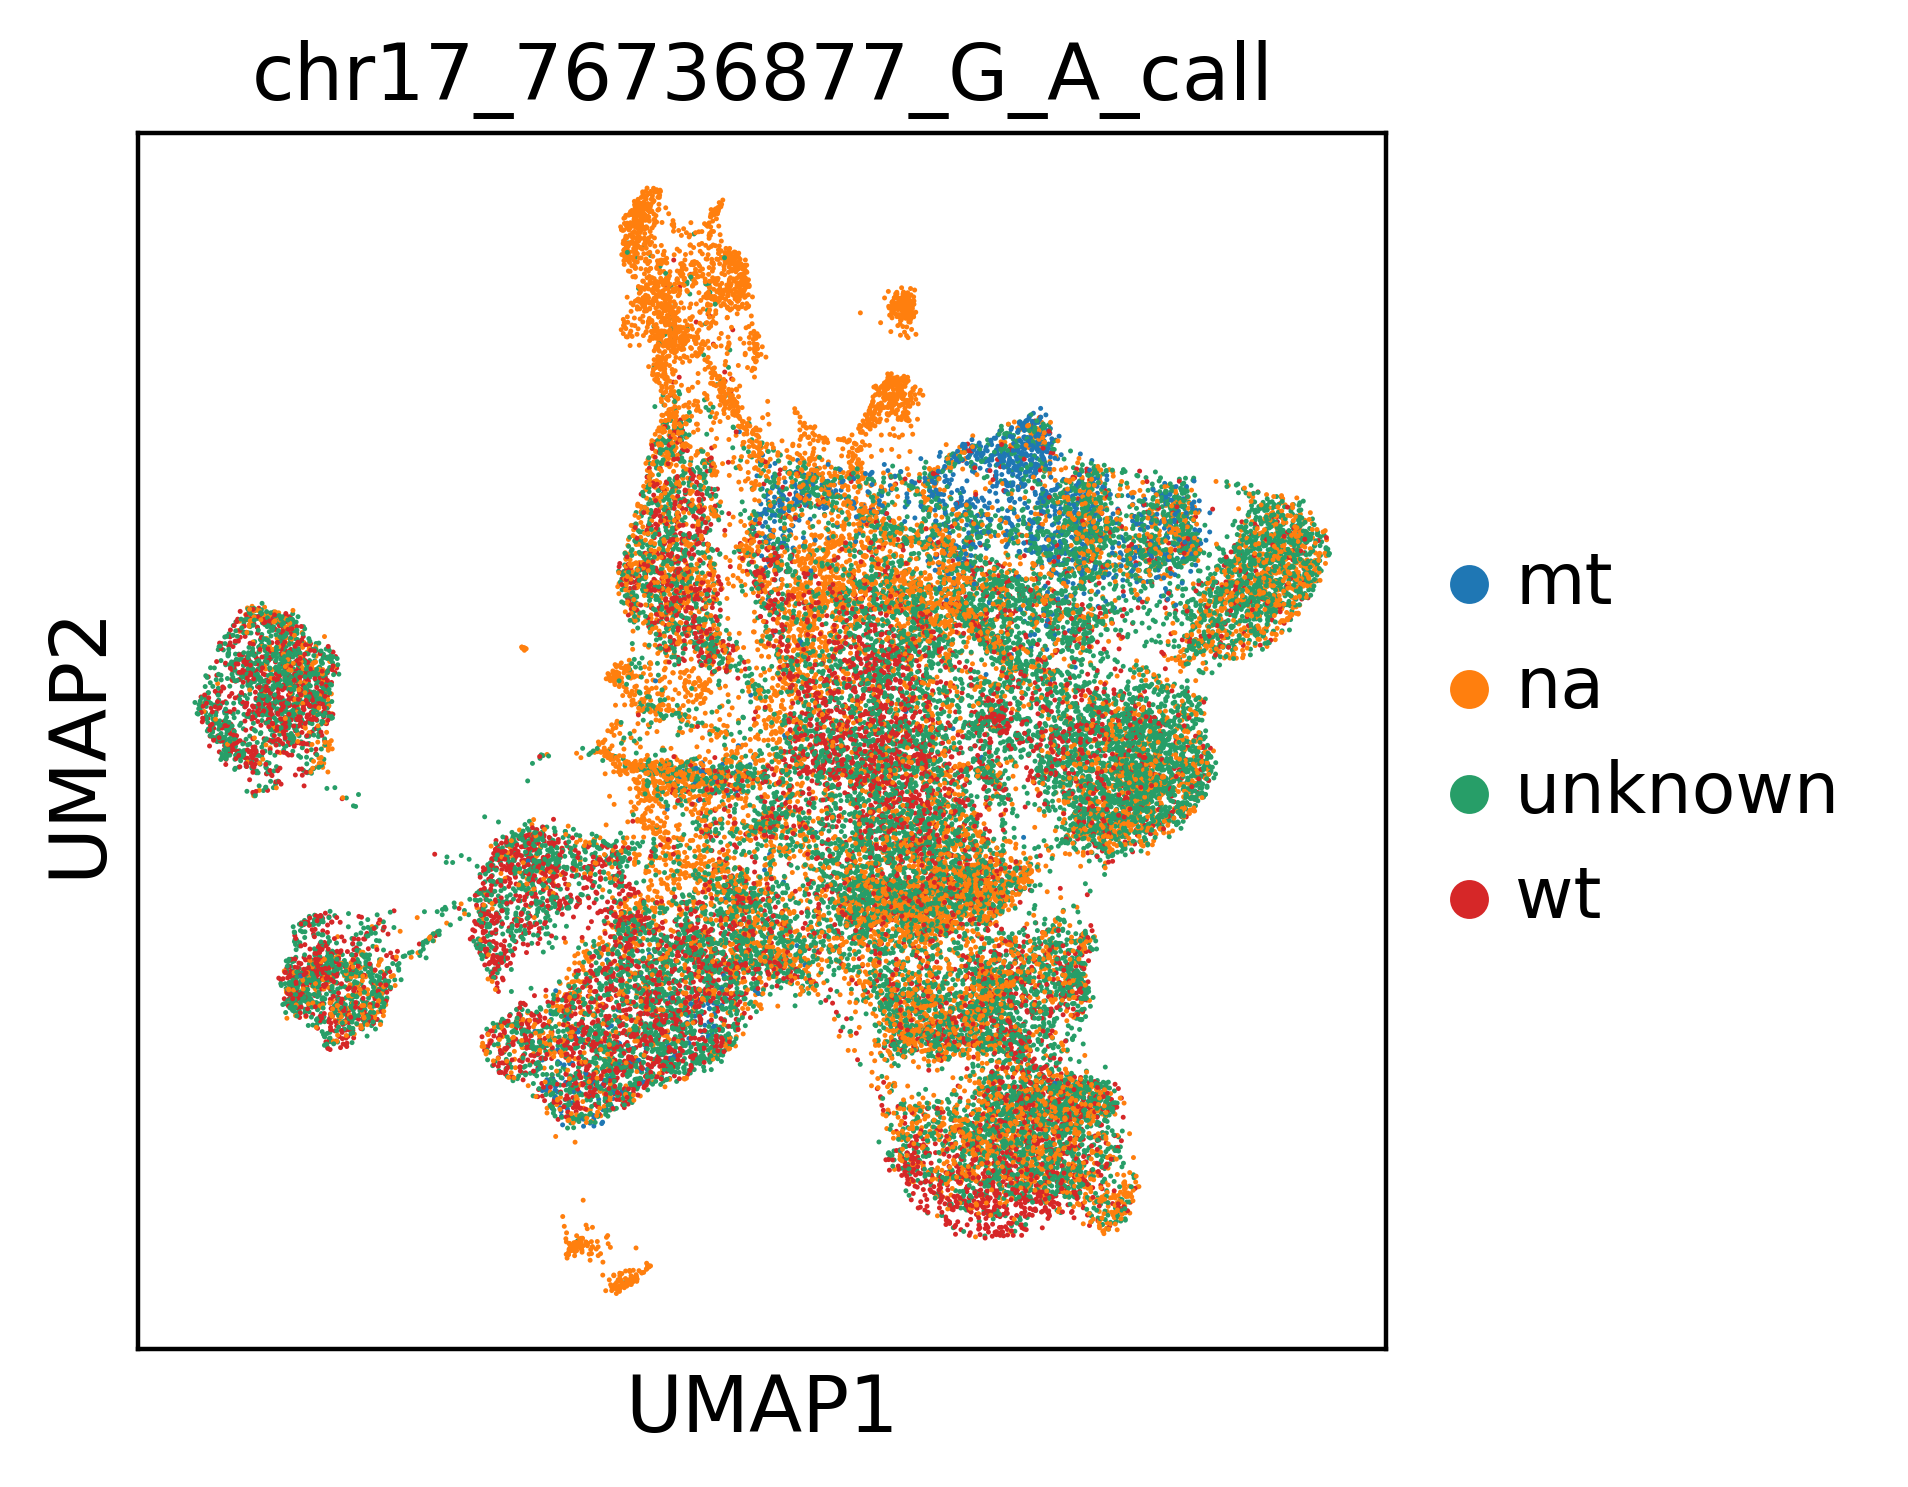

In [23]:
sc.pl.umap(adata_sc_mut, color=['chr17_76736877_G_A_call'])

In [24]:
from MDS_figure2_dicts import *

In [25]:
newdf['ctgrey'] = "#c8c8c8"

{'chr17:76736877_G>C': 'SRSF2',
 'chr17:7675082_G>T': 'TP53',
 'chr17:76736877_G>A': 'SRSF2',
 'chr17:76736877_G>T': 'SRSF2',
 'chr17:7674250_C>T': 'TP53',
 'chr17:7676051_G>C': 'TP53'}

In [26]:
newdf[newdf['patient_alias'] == "P25"]

,X_coord_umap,Y_coord_umap,celltype,outcome_C6D28,outcome_C12D29,timepoint_coarse,patient,patient_alias,leiden,chr17_76736877_G_A_call,...,chr17_76736877_G_C_mut,chr17_76736877_G_T_call,chr17_76736877_G_T_mut,chr17_7674250_C_T_call,chr17_7674250_C_T_mut,chr17_7675082_G_T_call,chr17_7675082_G_T_mut,chr17_7676051_G_C_call,chr17_7676051_G_C_mut,ctgrey
AAACCTGCACACGCTG-1,9.197547,1.370246,MEP/MKP,Non-Responder,Responder,mid,61214002,P25,1,unknown,...,False,wt,False,unknown,False,unknown,False,unknown,False,#c8c8c8
AAACCTGCACGACGAA-1,11.105094,2.385956,HSC,Non-Responder,Responder,mid,61214002,P25,2,wt,...,False,wt,False,unknown,False,unknown,False,unknown,False,#c8c8c8
AAACCTGCAGTGACAG-1,12.038097,4.714365,MPP,Non-Responder,Responder,mid,61214002,P25,6,wt,...,False,wt,False,unknown,False,unknown,False,unknown,False,#c8c8c8
AAACGGGAGAGGGCTT-1,13.595757,2.497546,HSC,Non-Responder,Responder,mid,61214002,P25,2,na,...,na,na,na,na,na,na,na,na,na,#c8c8c8
AAACGGGCAATCCGAT-1,5.948301,-0.441661,MEP/MKP,Non-Responder,Responder,mid,61214002,P25,1,wt,...,False,wt,False,unknown,False,unknown,False,unknown,False,#c8c8c8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAGCCGACATAGACTC-1,4.919551,-5.984189,Erythroblast,Non-Responder,Responder,post,61214002,P25,24,na,...,na,na,na,na,na,na,na,na,na,#c8c8c8
GTAACGTAGGATTCGG-1,4.248346,-5.362476,Erythroblast,Non-Responder,Responder,post,61214002,P25,24,na,...,na,na,na,na,na,na,na,na,na,#c8c8c8
AAAGATGCACCTGGTG-1,12.451303,8.130538,Patient specific cluster,Non-Responder,Responder,pre,61214002,P25,14,na,...,na,na,na,na,na,na,na,na,na,#c8c8c8
GAAGCAGGTGACGCCT-1,11.195683,3.331620,HSC,Non-Responder,Responder,pre,61214002,P25,2,na,...,na,na,na,na,na,na,na,na,na,#c8c8c8


In [27]:
newdf[(newdf['patient_alias'] == "P25") & (newdf['timepoint_coarse'] == 'mid')]['outcome_C6D28'].value_counts().idxmax()

'Non-Responder'

In [28]:
newdf['timepoint_coarse'].value_counts()

timepoint_coarse
pre              13693
mid              12010
progression       6828
post              5093
not available        2
Name: count, dtype: int64

In [29]:
newdf.columns[newdf.columns.str.contains('call')]

Index(['chr17_76736877_G_A_call', 'chr17_76736877_G_C_call',
       'chr17_76736877_G_T_call', 'chr17_7674250_C_T_call',
       'chr17_7675082_G_T_call', 'chr17_7676051_G_C_call'],
      dtype='object')

In [30]:
# plot a umap for each patient and timepoint and mutation outcome
import matplotlib.lines as mlines
import re

size_mapping={'unknown':10,'wt':10,'mt':10}

for chr in list(newdf.columns[newdf.columns.str.contains('call')]):
    for p in list(set(newdf['patient_alias'])):

        fig,axes = plt.subplots(1,4, figsize=(28,7), dpi=300)

        for i, timepoint in enumerate(['pre','mid','post','progression']):
            ax = axes[i]
            
            #plot the dots for the desired categories
            df=newdf[newdf['patient_alias'] == p]
            data=df[df['timepoint_coarse'] == timepoint]
                
            #plot count in the top right hand corner of plot for easy cross checking
            counts = data[chr].value_counts()
            unknown_count = counts.get("unknown", 0)
            wt_count = counts.get("wt", 0)
            mt_count = counts.get("mt", 0)

            text_str = f"unknown: {unknown_count}\nwt: {wt_count}\nmt: {mt_count}"

            if wt_count == 0 and unknown_count == 0 and mt_count == 0 :
                fig.delaxes(ax)

            else:

                #plot the scatterplot for all cells
                ax.scatter(newdf['X_coord_umap'], newdf['Y_coord_umap'], c=newdf['ctgrey'], s=5)

                color_map = {'unknown':'grey','wt':'blue','mt':'red'}
                zorder_map = {'unknown':1,'wt':2,'mt':3}

                
                for category in color_map.keys():
                    subset = data[data[chr] == category]

                    sns.scatterplot(subset,
                    x='X_coord_umap',
                    y='Y_coord_umap',
                    ax=ax,
                    size=size_mapping[category],
                    color=color_map[category],
                    zorder=zorder_map[category],
                    edgecolor='none')

                ax.text(0.95,0.95,text_str, transform=ax.transAxes, ha="right", va="top", fontsize=12)

                ax.set_title(p+" "+timepoint, fontsize=25)
                ax.grid(False)
                ax.legend().set_visible(False)
                ax.set_xticks([])
                ax.set_yticks([])
                ax.set_xlabel('')
                ax.set_ylabel('')


        #create a dummy handle
        sh1 = mlines.Line2D([0], [0], marker='o', label='unknown',color='grey')
        sh2 = mlines.Line2D([0], [0], marker='o', label='wt',color='blue')
        sh3 = mlines.Line2D([0], [0], marker='o', label='mt',color='red')
        fig.suptitle(chr, fontsize=40)
        fig.legend(handles=[sh1, sh2, sh3], title='Mutations', markerscale=5,loc="upper center",bbox_to_anchor=(0.5,-0.1), fontsize=20,ncol=3) 
        fig.tight_layout()

        savefigname = re.sub(r"[^\w]", "_", str(chr))
        fig.savefig("figures/mutation_calls/"+savefigname+"_"+str(p)+"_UMAP_2.png", format='png', bbox_inches='tight')
        plt.close()
    


In [40]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import re
import matplotlib.font_manager as fm

#plot parameters

font_path = "/usr/share/fonts/truetype/msttcorefonts/Arial.ttf"  
arial_font = fm.FontProperties(fname=font_path)

plt.rcParams["font.family"] = arial_font.get_name()
plt.rcParams['pdf.fonttype'] = 'truetype'


size_mapping = {'unknown': 10, 'wt': 15, 'mt': 15}
color_map = {'unknown': 'green', 'wt': 'blue', 'mt': 'red'}
zorder_map = {'unknown': 1, 'wt': 2, 'mt': 3}

for chr in newdf.columns[newdf.columns.str.contains('call')]:
    for p in newdf['patient_alias'].unique():
        valid_axes_data = []  # Track valid subplots

        for timepoint in ['pre', 'mid', 'post', 'progression']:
            df = newdf[newdf['patient_alias'] == p]
            data = df[df['timepoint_coarse'] == timepoint]

            # Count mutations
            counts = data[chr].value_counts()
            unknown_count = counts.get("unknown", 0)
            wt_count = counts.get("wt", 0)
            mt_count = counts.get("mt", 0)

            # Skip subplot if all counts are zero
            if wt_count == 0 and unknown_count == 0 and mt_count == 0:
                continue

            valid_axes_data.append((timepoint, data))

        # If no valid subplots exist, skip this figure
        if not valid_axes_data:
            continue

        # Dynamically create figure with the correct number of subplots
        fig, axes = plt.subplots(1, len(valid_axes_data), figsize=(7 * len(valid_axes_data), 7), dpi=300)

        # Ensure axes is iterable (if only one subplot, `axes` is not a list)
        if len(valid_axes_data) == 1:
            axes = [axes]

        for ax, (timepoint, data) in zip(axes, valid_axes_data):
            # Plot background UMAP scatter
            ax.scatter(newdf['X_coord_umap'], newdf['Y_coord_umap'], c=newdf['ctgrey'], s=5)

            # Overlay mutation points
            for category in color_map.keys():
                subset = data[data[chr] == category]
                sns.scatterplot(subset, x='X_coord_umap', y='Y_coord_umap', ax=ax,
                                size=size_mapping[category], color=color_map[category],
                                zorder=zorder_map[category], edgecolor='none')

            # Display counts
            counts = data[chr].value_counts()
            text_str = f"unknown: {counts.get('unknown', 0)}\nwt: {counts.get('wt', 0)}\nmt: {counts.get('mt', 0)}"
            ax.text(0.95, 0.95, text_str, transform=ax.transAxes, ha="right", va="top", fontsize=15)

            ax.set_title(f"{p} {timepoint}", fontsize=25)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.grid(False)
            ax.legend().set_visible(False)

        # Adjust layout dynamically
        fig.suptitle(chr, fontsize=40)
        fig.tight_layout()

        # Create legend
        handles = [mlines.Line2D([0], [0], marker='o', label=label, color=color_map[label])
                   for label in color_map.keys()]
        fig.legend(handles=handles, title='Mutations', markerscale=5, loc="upper center",
                   bbox_to_anchor=(0.5, -0.1), fontsize=20, ncol=3)

        # Save figure as PDF
        savefigname = re.sub(r"[^\w]", "_", str(chr))
        fig.savefig(f"figures/mutation_calls/{savefigname}_{p}_UMAP.pdf", format='pdf', bbox_inches='tight')
        plt.close(fig)


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

In [ ]:
adata_sc_mut.obs[['patient_alias','specific_outcome_C12D29']].value_counts()

patient_alias  specific_outcome_C12D29
P15            Progression                6016
P16            Progression                5138
P3             CR                         4768
P25            CRh                        4572
P2             Progression                4546
P1             CRh                        4430
P8             Progression                3303
P11            CR                         2250
P10            not available                 1
Name: count, dtype: int64